## Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.


- Fixed acidity: Represents the non-volatile acids in the wine, which contribute to the wine's overall acidity level.
- Volatile acidity: Indicates the amount of volatile acids in the wine, which can affect its aroma and taste.
- Citric acid: Measures the presence of citric acid in the wine, which can contribute to its freshness.
- Residual sugar: Represents the amount of sugar left in the wine after the fermentation process, which can influence its sweetness.
- Chlorides: Measures the amount of salts in the wine, which can affect its taste.
- Free sulfur dioxide: Indicates the presence of SO2, which acts as a preservative and antimicrobial agent in the wine.
- Total sulfur dioxide: Represents the total amount of free and bound forms of sulfur dioxide in the wine.
- Density: Indicates the density of the wine, which is influenced by factors such as alcohol content and sugar concentration.
- pH: Measures the acidity or alkalinity of the wine.
- Sulphates: Represents the amount of sulphates present in the wine, which can contribute to its preservation.
- Alcohol: Indicates the alcohol content of the wine.
- Quality: The target variable representing the quality of the wine, typically rated on a scale (e.g., from 1 to 10).

***

## Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.


Handling missing data is an essential step in the feature engineering process. Different imputation techniques can be used to fill in missing values. The choice of imputation technique depends on various factors, including the type and amount of missing data, as well as the characteristics of the data set.


Advantages and disadvantages of different imputation techniques:

- Mean imputation: Replaces missing values with the mean of the available data. It is simple to implement but may distort the variable's distribution and underestimate the uncertainty of imputed values.
- Median imputation: Replaces missing values with the median of the available data. It is robust to outliers but can also distort the variable's distribution.
- Mode imputation: Replaces missing values with the mode (most frequent value) of the available data. It is suitable for categorical variables but may not capture the full variability of the variable.
- Multiple imputation: Generates multiple plausible values for missing data based on the observed data's distribution. It accounts for the uncertainty of imputed values but requires more computational resources.


***

## Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?


- Data collection: Gather data on various factors that may influence student performance, such as socio-economic background, study habits, class attendance, and previous academic performance.
- Exploratory data analysis: Examine the distributions, correlations, and summary statistics of the variables to gain insights and identify potential relationships.
- Regression analysis: Use regression models to understand the relationship between the independent variables (e.g., socio-economic background, study time) and the dependent variable (e.g., exam scores). This helps quantify the impact of each factor on students' performance.
- Hypothesis testing: Conduct hypothesis tests to determine if certain factors have a statistically significant impact on student performance. For example, a t-test can be used to compare the exam scores of different groups of students based on a specific characteristic (e.g., gender, study habits).

***

## Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?


- Handling missing data: Imputing missing values using appropriate techniques, such as mean imputation or multiple imputation.
- Creating new variables: Generating additional features that may capture important information, such as calculating the average score across different subjects or creating dummy variables for categorical variables.
- Scaling and normalization: Standardizing variables to have a mean of 0 and a standard deviation of 1, ensuring variables are on a comparable scale.
- Encoding categorical variables: Converting categorical variables into numerical representations, such as one-hot encoding or label encoding.
- Handling outliers: Identifying and addressing outliers that may affect the analysis or model performance, such as by winsorizing or transforming the variables.

The specific techniques used for feature engineering depend on the characteristics of the data, the research questions, and the modeling approach. It is essential to carefully consider the impact of each transformation on the analysis and interpret the results accordingly.

***

## Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?


In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
wd = pd.read_csv("wine.csv")


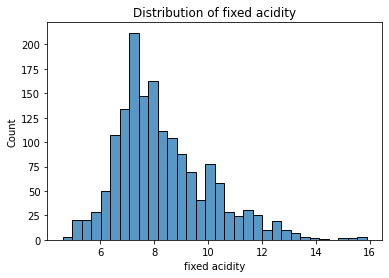

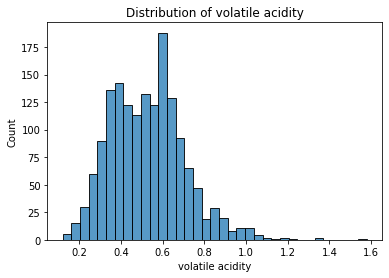

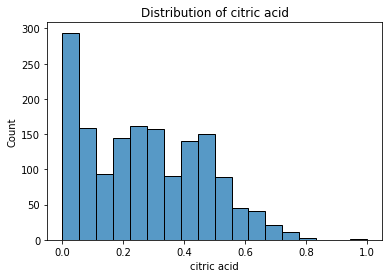

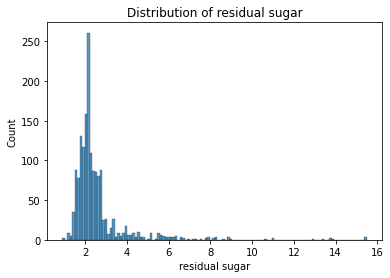

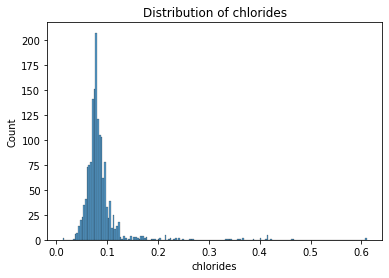

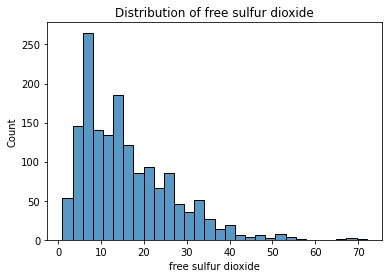

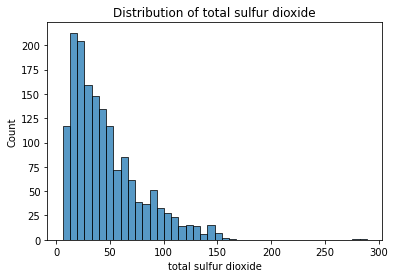

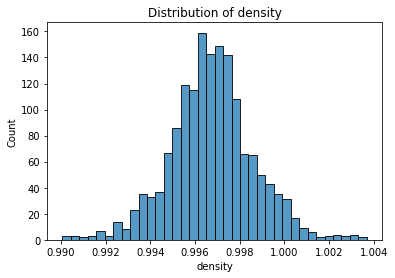

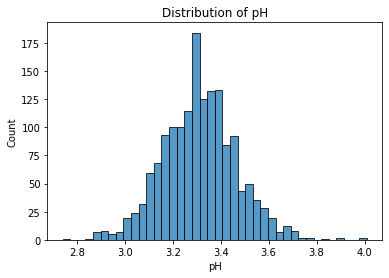

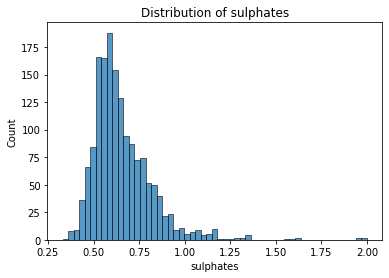

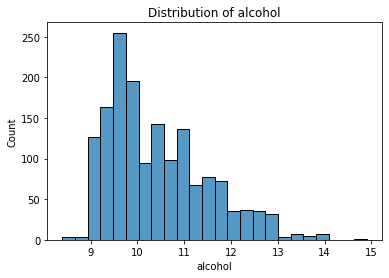

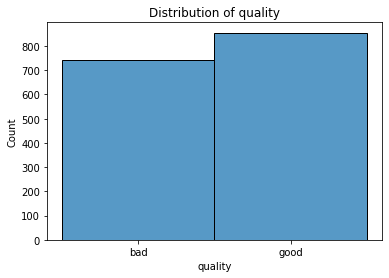

In [155]:
for column in wd.columns:
    plt.figure()
    sns.histplot(data=wd, x=column)
    plt.title(f"Distribution of {column}")
    plt.show()

In [159]:
wd.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Most of the non-normality features are:
- citric acid
- residual sugar
- chlorides

We can use:
 - Normalizatioin
 - Scalling
 - SMOT 
to normalize these data

***

## Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [162]:
from sklearn.decomposition import PCA

X = wd.iloc[:, :-1]


# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)


In [163]:
# Calculate the cumulative explained variance ratio
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)


In [164]:
# Find the minimum number of components required to explain 90% of the variance
n_components = np.argmax(explained_variance_ratio_cumulative >= 0.9) + 1


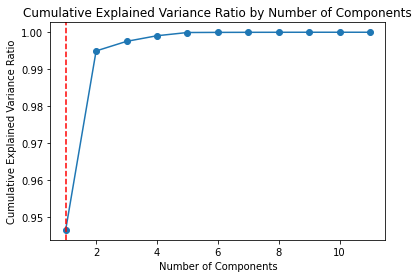

Minimum number of principal components required to explain 90% of the variance: 1


In [166]:
# Plot the cumulative explained variance ratio
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.axvline(x=n_components, color='red', linestyle='--')
plt.show()

# Print the result
print(f"Minimum number of principal components required to explain 90% of the variance: {n_components}")



